In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.13.1


In [5]:
mnist = tf.keras.datasets.fashion_mnist

In [6]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

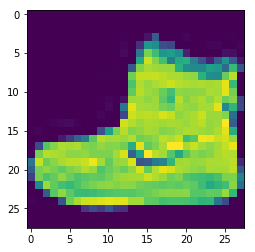

In [9]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [7]:
#normalize data between 0 and 1, since 
training_images = training_images / 255.0
test_images = test_images / 255.0

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [13]:
model.compile(optimizer= tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy')

model.fit(training_images,training_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2807
Epoch 2/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2680
Epoch 3/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2584
Epoch 4/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2482
Epoch 5/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2379
Epoch 6/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2293
Epoch 7/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2248
Epoch 8/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2147
Epoch 9/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2092
Epoch 10/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2038
Epoch 11/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1988
Epoch 12/20
60000/60000 [=====

In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.3799


0.37986966101527214

In [15]:
classifications = model.predict(test_images)

print(classifications[0])

[4.0743009e-10 3.0377659e-13 4.4804077e-13 3.6817134e-15 4.7105614e-16
 1.3847643e-06 3.7750968e-14 4.5182889e-05 6.8830284e-12 9.9995339e-01]


In [16]:
print(test_labels[0])

9


# Exercise 2

In [17]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

11493376/11490434 [==============================] - 1s 0us/step


In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.1858
Epoch 2/5
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0763
Epoch 3/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0469
Epoch 4/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0339
Epoch 5/5
10000/10000 [==============================] - 0s 36us/sample - loss: 0.0680


0.06798353680749424

In [19]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[1.0338810e-11 2.1868219e-12 1.2267236e-09 4.3658597e-09 1.7040106e-17
 1.1060097e-09 7.5401078e-16 1.0000000e+00 1.6988851e-11 1.3988716e-09]
7


# Exercise 8

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4733
Epoch 2/5
59744/60000 [============================>.] - ETA: 0s - loss: 0.3557
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3558


In [21]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3999


0.39994717936515806